# Variação de vendas e lucros de companhias abertas brasileiras 

<p>Nesta análise será realizado um processo de <b>data wrangling</b> nos dados de um dataset contendo informações financeiras de companhias abertas brasileiras nos anos de 2021 e 2022. Todo o processo de limpeza e estruturação dos dados serão feitos visando a investigação de como foi a variação de vendas e lucros das empresas, e suas evoluções de receitas e lucros líquidos levando em conta o setor de atuação.</p>
    
    
Fonte: Comissão de Valores Mobiliários (CVM)<br>
        Disponível em: https://dados.cvm.gov.br/dataset/cia_aberta-doc-dfp

    
   <b> Objetivos:</b>
   <ul>  
    Realizar procedimentos de data wrangling nos dados de forma que possam ser extraídos facilmente do dataset observações que ajudem a:
<li>Investigar como foi a variação nas vendas e no lucro das empresas disponíveis no dataset.</li>
<li>Observar a forma com que evoluíram a receita de vendas e o lucro líquido entre os anos de 2021 e 2022.</li>
<li>Analisar se a evolução citada no objetivo anterior foi diferente entre setores.</li>
    </ul>
    

<b>1. Importando bibliotecas</b>

In [66]:
library(tidyverse)

<b> 2. Importando as bases de dados</b>

Base de dados da CVM com as informações financeiras das empresas brasileiras nos ano de 2021 e 2022:

In [2]:
base_cvm <- read.csv("(3.2) CVM Resultado.csv",
                     sep = ";", 
                     encoding = "latin1")

Base de dados contendo os setores de atuações das empresas de capital aberto listadas no dataset de realização da análise.

In [3]:
dados_setores <- read.csv("(3.3) CVM Dados Cadastrais.csv",
                       sep = ";", 
                       encoding = "latin1")

<b> 3. Overview dos datasets (observando a estrutura dos bancos de dados)</b>

Base de dados CVM

In [6]:
head(base_cvm)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125947217,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,236549051,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01.01,Receita de Juros,125947217,N
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01.01,Receita de Juros,236549051,N
5,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.02,Despesas de Intermediação Financeira,-66273138,S
6,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.02,Despesas de Intermediação Financeira,-162202484,S


<i>Ao observarmos a estrutura dos dados verificamos que as informações das contas já estão serparadas entre os anos de 2021 e 2022, anos estes que serão realizados as análises.</i>

In [20]:
dim(base_cvm)

[1] 23484    15

Base de dados cadastrais CVM contendo o setor de atuação das empresas

In [6]:
head(dados_setores)

,CNPJ_CIA,DENOM_SOCIAL,DENOM_COMERC,DT_REG,DT_CONST,DT_CANCEL,MOTIVO_CANCEL,SIT,DT_INI_SIT,CD_CVM,⋯,UF_RESP,PAIS_RESP,CEP_RESP,DDD_TEL_RESP,TEL_RESP,DDD_FAX_RESP,FAX_RESP,EMAIL_RESP,CNPJ_AUDITOR,AUDITOR
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,⋯,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,08.773.135/0001-00,2W ECOBANK S.A.,2W ECOBANK S.A.,2020-10-29,2007-03-23,,,ATIVO,2020-10-29,25224,⋯,SP,,4707000,11,39579400,NA,NA,ri@2wenergia.com.br,61.366.936/0001-25,ERNST & YOUNG AUDITORES INDEPENDENTES S/S LTDA.
2,11.396.633/0001-87,3A COMPANHIA SECURITIZADORA,TRIPLO A COMPANHIA SECURITIZADORA,2010-03-08,2009-11-03,2015-12-18,Cancelamento Voluntário - IN CVM 480/09,CANCELADA,2015-12-18,21954,⋯,RJ,,20020000,21,22338867,21,22338867,juridico@triploasec.com.br,60.525.706/0001-07,MOORE STEPHENS LIMA LUCCHESI AUDITORES INDEPENDENTES
3,12.091.809/0001-55,3R PETROLEUM OLÉO E GÁS S.A.,,2020-11-09,2010-06-08,,,ATIVO,2020-11-09,25291,⋯,RJ,,22250180,21,21455555,0,0,ri@3rpetroleum.com.br,57.755.217/0001-29,KPMG AUDITORES INDEPENDENTES LTDA.
4,01.547.749/0001-16,521 PARTICIPAÇOES S.A. - EM LIQUIDAÇÃO EXTRAJUDICIAL,521 PARTICIPAÇÕES S/A,1997-07-11,1996-07-30,,,ATIVO,1997-07-11,16330,⋯,,,NA,,NA,NA,NA,,18.596.945/0001-83,BAKER TILLY 4PARTNERS AUDITORES INDEPENDENTES S/S
5,01.851.771/0001-55,524 PARTICIPAÇOES SA,524 PARTICIPACOES SA,1997-05-30,1997-04-02,,,ATIVO,1997-05-30,16284,⋯,RJ,,20020010,21,38043700,0,0,gar@opportunity.com.br,40.262.602/0001-31,"BKR - LOPES, MACHADO AUDITORES"
6,01.919.008/0001-19,525 PARTICIPAÇOES SA,525 PARTICIPACOES SA,1997-07-16,1997-04-02,2006-05-30,ELISÃO POR INCORPORAÇÃO,CANCELADA,2006-05-30,16349,⋯,RJ,,22290160,21,21967200,21,21967201,kevin@mattosfilho.com.br,11.245.719/0001-09,DIRECTA AUDITORES


In [7]:
dim(dados_setores)

[1] 2571   47

<i>Por conter um número extenso de variáveis, não foi possivel identificar a nossa variavel de interesse (setor de atividade) apenas com o comando head. Por isso, será feito uma filtragem mais específica relacionando a palavra setor com as colunas do nosso dataset.</i>

In [8]:
names(dados_setores)

[1] "CNPJ_CIA"           "DENOM_SOCIAL"       "DENOM_COMERC"      
 [4] "DT_REG"             "DT_CONST"           "DT_CANCEL"         
 [7] "MOTIVO_CANCEL"      "SIT"                "DT_INI_SIT"        
[10] "CD_CVM"             "SETOR_ATIV"         "TP_MERC"           
[13] "CATEG_REG"          "DT_INI_CATEG"       "SIT_EMISSOR"       
[16] "DT_INI_SIT_EMISSOR" "CONTROLE_ACIONARIO" "TP_ENDER"          
[19] "LOGRADOURO"         "COMPL"              "BAIRRO"            
[22] "MUN"                "UF"                 "PAIS"              
[25] "CEP"                "DDD_TEL"            "TEL"               
[28] "DDD_FAX"            "FAX"                "EMAIL"             
[31] "TP_RESP"            "RESP"               "DT_INI_RESP"       
[34] "LOGRADOURO_RESP"    "COMPL_RESP"         "BAIRRO_RESP"       
[37] "MUN_RESP"           "UF_RESP"            "PAIS_RESP"         
[40] "CEP_RESP"           "DDD_TEL_RESP"       "TEL_RESP"          
[43] "DDD_FAX_RESP"       "FAX_RESP"           "EMAIL_RESP"        
[46] "CNPJ_AUDITOR"       "AUDITOR"

In [9]:
select(dados_setores, contains("SETOR"))

SETOR_ATIV
<fct>
Energia Elétrica
Securitização de Recebíveis
Petróleo e Gás
Emp. Adm. Part. - Energia Elétrica
Emp. Adm. Part. - Sem Setor Principal
Emp. Adm. Part. - Sem Setor Principal
Emp. Adm. Participações
Emp. Adm. Participações
"Máquinas, Equipamentos, Veículos e Peças"


<b> 4.Selecionando variáveis de interesse no dataset dado_cvm</b>

Para a concretização do objetivo de investigar como foi a variação nas vendas e no lucro das empresas, será selecionado apenas as contas que nos forneceram os objetos de interesse dentro do dataset.

In [10]:
options(max.print=3000)
ds_contas <- unique(base_cvm$DS_CONTA)
print(ds_contas)

   [1] Receitas de Intermediação Financeira                                                                
   [2] Receita de Juros                                                                                    
   [3] Despesas de Intermediação Financeira                                                                
   [4] Despesa de Juros                                                                                    
   [5] Resultado Bruto de Intermediação Financeira                                                         
   [6] Outras Despesas e Receitas Operacionais                                                             
   [7] Despesa de Provisão para Perda Esperada para Risco de Crédito                                       
   [8] Receitas de Prestação de Serviços                                                                   
   [9] Despesas com Pessoal                                                                                
  [10] Outras Despesas de Ad

In [11]:
ds_contas[grepl("Receita", ds_contas)]


[1] Receitas de Intermediação Financeira                                                                
  [2] Receita de Juros                                                                                    
  [3] Outras Despesas e Receitas Operacionais                                                             
  [4] Receitas de Prestação de Serviços                                                                   
  [5] Outras Receitas Operacionais                                                                        
  [6] Receita de Venda de Bens e/ou Serviços                                                              
  [7] Despesas/Receitas Operacionais                                                                      
  [8] Receitas Financeiras                                                                                
  [9] Receitas de juros, comissões e taxas                                                                
 [10] Receitas de aplicações financeiras                                                                  
 [11] Receita De Juros Sobre Dividendos                                                                   
 [12] Receitas da Intermediação Financeira                                                                
 [13] Receitas de Juros                                                                                   
 [14] Receitas de Serviços e Comissões                                                                    
 [15] Outras Despesas/Receitas Operacionais                                                               
 [16] Outras Receitas (Despesas) Administrativas                                                          
 [17] Outras Receitas                                                                                     
 [18] Receita de venda ou reembolso de projetos                                                           
 [19] Receita Operacional bruta                                                                           
 [20] Receita bruta                                                                                       
 [21] Receita com indenizações recebidas                                                                  
 [22] Receitas de operações de crédito                                                                    
 [23] Receitas de prestações de serviços                                                                  
 [24] Receita com títulos de capitalização                                                                
 [25] Receitas com imóveis de renda                                                                       
 [26] Outras Receitas (Nota 26)                                                                           
 [27] Receitas Financeiras (Nota 27)                                                                      
 [28] Receitas financeiras                                                                                
 [29] Receita financeira                                                                                  
 [30] Receita de infra, operação e manutenção, ganho de eficiência da implem da infra e outras, líquidas  
 [31] Receitas - Revisão Tarifaria Periódica, líquidas                                                    
 [32] Receita de Serviços                                                                                 
 [33] Receita de Construção                                                                               
 [34] Receita de Venda de Bens e/ou ServiÃ§os                                                             
 [35] Outras Receitas, líquidas                                                                           
 [36] Outros Despesas/Receitas Liquidas                                                                   
 [37] Receitas com Financeiras                                                                            
 [38] Receita líquida da venda de bens e/ou

In [12]:
ds_contas[grepl("Lucro", ds_contas)]


[1] Resultado antes dos Tributos sobre o Lucro                            
 [2] Imposto de Renda e Contribuição Social sobre o Lucro                  
 [3] Lucro ou Prejuízo das Operações Continuadas                           
 [4] Lucro ou Prejuízo antes das Participações e Contribuições Estatutárias
 [5] Participações nos Lucros e Contribuições Estatutárias                 
 [6] Lucro ou Prejuízo Líquido Consolidado do Período                      
 [7] Lucro por Ação (R$/Ação)                                              
 [8] Lucro Básico por Ação                                                 
 [9] Lucro Diluído por Ação                                                
[10] Resultado Antes dos Tributos sobre o Lucro                            
[11] Lucro/Prejuízo Líquido das Operações Descontinuadas                   
[12] Lucro/Prejuízo Consolidado do Período                                 
[13] Lucro por Ação - (Reais / Ação)                                       
[14] Lucro por Ação - (R$ / Ação)                                          
[15] Imposto de Renda e ContribuiÃ§Ã£o Social sobre o Lucro                
[16] Lucro/PrejuÃ­zo LÃ­quido das OperaÃ§Ãµes Descontinuadas               
[17] Lucro/PrejuÃ­zo Consolidado do PerÃ­odo                               
[18] Lucro por AÃ§Ã£o - (Reais / AÃ§Ã£o)                                   
[19] Lucro BÃ¡sico por AÃ§Ã£o                                              
[20] Lucro DiluÃ­do por AÃ§Ã£o                                             
[21] Participações nos Lucros - Empregados                                 
[22]  Lucro/Prejuízo Líquido das Operações Descontinuadas                  
[23] Participações dos Empregados no Lucro                                 
[24] Participação nos Lucros ou Resultados                                 
[25] Lucro Proveniente da Alienação de Bens do Ativo Imobilizado           
[26] Lucro/Prejuízo Líquido da Dimensão de Techfin                         
[27] Lucro/Prejuízo Líquido da Operação de Hardware                        
[28] Lucro/Prejuizo Liquido das Operações Descontinuadas Não Controladores 
[29] Participação dos Funcionários no Lucro                                
[30] Programa de Participação dos Lucros e Resultado                       
1170 Levels:  Atribuído a Sócios da Empresa Controladora  ...

<i> No dataset temos 1170 tipos de conta, e diversas delas referem-se ao Lucro e Receita, mas para a relaização da análise de acordo com os objetivos, serão utilizadas apenas duas, <b>Receitas de Intermediação Financeira</b> e <b> Lucro/Prejuízo Consolidado do Período</b>.

In [13]:
base_cvm_filtrada <-filter(base_cvm, (DS_CONTA=="Receitas de Intermediação Financeira"|DS_CONTA=="Lucro/Prejuízo Consolidado do Período"))


In [14]:
head(base_cvm_filtrada )

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125947217,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,236549051,S
3,00.001.180/0001-26,2022-12-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.11,Lucro/Prejuízo Consolidado do Período,5713633,S
4,00.001.180/0001-26,2022-12-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.11,Lucro/Prejuízo Consolidado do Período,3638382,S
5,00.070.698/0001-11,2022-12-31,1,COMPANHIA ENERGÉTICA DE BRASÍLIA - CEB,14451,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.11,Lucro/Prejuízo Consolidado do Período,1303153,S
6,00.070.698/0001-11,2022-12-31,1,COMPANHIA ENERGÉTICA DE BRASÍLIA - CEB,14451,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.11,Lucro/Prejuízo Consolidado do Período,258053,S


In [15]:
dim(base_cvm_filtrada)

[1] 654  15

<i>Alguns dados desejados para a análise não foram filtrados por conta da codificação de caracteres. Para evitar este tipo de erro e facilitar os próxmios passos da análise, as contas de interesse serão filtradas pelo seus códigos descritos na variável CD_CONTA.</i>

In [16]:
base_cvm_filtrada <-filter(base_cvm, (CD_CONTA=="3.01"|CD_CONTA=="3.11"))


In [17]:
head(base_cvm_filtrada)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125947217,S
2,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,236549051,S
3,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.11,Lucro ou Prejuízo Líquido Consolidado do Período,19722871,S
4,00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.11,Lucro ou Prejuízo Líquido Consolidado do Período,29849335,S
5,00.001.180/0001-26,2022-12-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receita de Venda de Bens e/ou Serviços,34626834,S
6,00.001.180/0001-26,2022-12-31,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receita de Venda de Bens e/ou Serviços,34074233,S


In [18]:
dim(base_cvm_filtrada)

[1] 1302   15

<i>Para facilitar ainda mais a análise o dataset será reorganizado de forma a possibilitar a vizualização dos dados pelo tipo de conta, em que, as contas de mesmo código pertecentes a mesma empresa, mas que correspondem a anos diferentes continuem em sequência.</i>

In [19]:
base_cvm_filtrada <- base_cvm_filtrada %>%
group_by(CD_CONTA,CD_CVM) %>%
arrange(base_cvm_filtrada, DT_REFER, .by_group = T) %>%
ungroup()

In [20]:
head(base_cvm_filtrada)

CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
92.693.019/0001-89,2022-12-31,1,PANATLANTICA S.A.,94,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receita de Venda de Bens e/ou Serviços,2668221,S
92.693.019/0001-89,2022-12-31,1,PANATLANTICA S.A.,94,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receita de Venda de Bens e/ou Serviços,2331132,S
60.746.948/0001-12,2022-12-31,1,BCO BRADESCO S.A.,906,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125443431,S
60.746.948/0001-12,2022-12-31,1,BCO BRADESCO S.A.,906,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,205913274,S
00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125947217,S
00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,236549051,S


<i>verificando se há registros duplicados</i>:

In [21]:
base_cvm_filtrada <- distinct(base_cvm_filtrada)

In [22]:
dim(base_cvm_filtrada)

[1] 1302   15

In [23]:
contagem <- base_cvm_filtrada %>%
count(CD_CVM,CD_CONTA)

In [24]:
head(contagem)

CD_CVM,CD_CONTA,n
<int>,<fct>,<int>
94,3.01,2
94,3.11,2
906,3.01,2
906,3.11,2
1023,3.01,2
1023,3.11,2


In [25]:
arrange(contagem, desc(n))

CD_CVM,CD_CONTA,n
<int>,<fct>,<int>
26077,3.01,4
26077,3.11,4
94,3.01,2
94,3.11,2
906,3.01,2
906,3.11,2
1023,3.01,2
1023,3.11,2
1155,3.01,2


<i> Ao fazer a contagem de contas associadas ao código da empresa verica-se que a empresa <b>26077</b> possue contas duplicas, pois para cada empresa deveria haver apenas duas contas associadas de cada código.</i>

In [26]:
filter(base_cvm_filtrada, CD_CVM =='26077')

CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
26.345.998/0001-50,2022-09-30,1,TC S.A.,26077,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receita de Venda de Bens e/ou Serviços,91603,S
26.345.998/0001-50,2022-09-30,1,TC S.A.,26077,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-09-30,3.01,Receita de Venda de Bens e/ou Serviços,66541,S
26.345.998/0001-50,2022-12-31,3,TC S.A.,26077,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receita de Venda de Bens e/ou Serviços,91603,S
26.345.998/0001-50,2022-12-31,3,TC S.A.,26077,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receita de Venda de Bens e/ou Serviços,82437,S
26.345.998/0001-50,2022-09-30,1,TC S.A.,26077,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.11,Lucro/Prejuízo Consolidado do Período,1201,S
26.345.998/0001-50,2022-09-30,1,TC S.A.,26077,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-09-30,3.11,Lucro/Prejuízo Consolidado do Período,-41567,S
26.345.998/0001-50,2022-12-31,3,TC S.A.,26077,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.11,Lucro/Prejuízo Consolidado do Período,1201,S
26.345.998/0001-50,2022-12-31,3,TC S.A.,26077,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.11,Lucro/Prejuízo Consolidado do Período,-81973,S


In [27]:
base_cvm_filtrada <- base_cvm_filtrada %>%
filter(!(CD_CVM == 26077 & VERSAO == 3))

In [28]:
dim(base_cvm_filtrada)

[1] 1298   15

<b> 5.Adiconando as informações do setor de atuação disponíveis no dataset dados_setor ao dataset base_cvm_filtrada </b>

<i>Separando apenas as variáveis de interesse dentro do dataset dados_setores:</i>

In [29]:
setor<- dados_setores %>%
select(CD_CVM, SETOR_ATIV) %>%
filter(SETOR_ATIV != "") %>%
distinct()

<i> Realizando o merge entre os dois datasets:</i>

In [30]:
base_cvm_filtrada <- base_cvm_filtrada %>%
left_join(setor, by = "CD_CVM")


In [31]:
head(base_cvm_filtrada)

CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,SETOR_ATIV
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
92.693.019/0001-89,2022-12-31,1,PANATLANTICA S.A.,94,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receita de Venda de Bens e/ou Serviços,2668221,S,Metalurgia e Siderurgia
92.693.019/0001-89,2022-12-31,1,PANATLANTICA S.A.,94,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receita de Venda de Bens e/ou Serviços,2331132,S,Metalurgia e Siderurgia
60.746.948/0001-12,2022-12-31,1,BCO BRADESCO S.A.,906,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125443431,S,Bancos
60.746.948/0001-12,2022-12-31,1,BCO BRADESCO S.A.,906,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,205913274,S,Bancos
00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125947217,S,Bancos
00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,236549051,S,Bancos


<b> 6. Calculando a variação percentual e gerando a variável de interesse <b/>

In [32]:
base_cvm_filtrada <- base_cvm_filtrada %>%
group_by (CD_CVM, CD_CONTA) %>%
mutate (VARIACAO = ((VL_CONTA - lag(VL_CONTA, n= 1L))/lag(VL_CONTA, n=1L))) %>%
ungroup()

In [33]:
head(base_cvm_filtrada)

CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA,SETOR_ATIV,VARIACAO
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
92.693.019/0001-89,2022-12-31,1,PANATLANTICA S.A.,94,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receita de Venda de Bens e/ou Serviços,2668221,S,Metalurgia e Siderurgia,NA
92.693.019/0001-89,2022-12-31,1,PANATLANTICA S.A.,94,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receita de Venda de Bens e/ou Serviços,2331132,S,Metalurgia e Siderurgia,-0.1263347
60.746.948/0001-12,2022-12-31,1,BCO BRADESCO S.A.,906,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125443431,S,Bancos,NA
60.746.948/0001-12,2022-12-31,1,BCO BRADESCO S.A.,906,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,205913274,S,Bancos,0.6414831
00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,PENÚLTIMO,2021-01-01,2021-12-31,3.01,Receitas de Intermediação Financeira,125947217,S,Bancos,NA
00.000.000/0001-91,2022-12-31,1,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2022-01-01,2022-12-31,3.01,Receitas de Intermediação Financeira,236549051,S,Bancos,0.8781602


<i>Arredondando as casas decimais:</i>

In [34]:
base_cvm_filtrada <- base_cvm_filtrada %>% 
  mutate(VARIACAO = round(VARIACAO, 3))

<b> 7. Realizando análises preliminares </b>

In [35]:
summarise(base_cvm_filtrada,
          observações=n(),
          média=mean(VARIACAO, na.rm = TRUE))

observações,média
<int>,<dbl>
1298,NaN


<i> Por conter na tabela alguns valores inf, ocosionados provalvemente por divisões por 0 no calculo da variação, não é possível calcular a média. Por isso, será excluído do dataset as variações que tendem ao infinito.</i>

In [36]:
inf <- is.infinite(base_cvm_filtrada$VARIACAO)

In [37]:
base_cvm_filtrada <- base_cvm_filtrada %>% 
  mutate(INF = inf) %>% 
  filter(INF == FALSE)

In [38]:
dim(base_cvm_filtrada)

[1] 1294   18

Para uma melhor análise será separado as variáveis em dois datasets de acordo com o código da conta. Outra possibilidade seria extrair as estatísticas descritivas utilizando o comando group_by.

In [39]:
base_3.01 <- base_cvm_filtrada %>% 
select (DENOM_CIA,CD_CVM,CD_CONTA, DS_CONTA, SETOR_ATIV, VARIACAO) %>%
filter(VARIACAO != "" & CD_CONTA != 3.11) %>%
distinct()

In [40]:
head(base_3.01)

DENOM_CIA,CD_CVM,CD_CONTA,DS_CONTA,SETOR_ATIV,VARIACAO
<fct>,<int>,<fct>,<fct>,<fct>,<dbl>
PANATLANTICA S.A.,94,3.01,Receita de Venda de Bens e/ou Serviços,Metalurgia e Siderurgia,-0.126
BCO BRADESCO S.A.,906,3.01,Receitas de Intermediação Financeira,Bancos,0.641
BCO BRASIL S.A.,1023,3.01,Receitas de Intermediação Financeira,Bancos,0.878
BANESTES S.A. - BCO EST ESPIRITO SANTO,1155,3.01,Receitas de Intermediação Financeira,Bancos,1.178
BCO ESTADO DO RIO GRANDE DO SUL S.A.,1210,3.01,Receitas de Intermediação Financeira,Bancos,0.763
BCO MERCANTIL DO BRASIL S.A.,1325,3.01,Receitas de Intermediação Financeira,Bancos,0.459


In [41]:
summary(base_3.01)

                                              DENOM_CIA       CD_CVM     
 3R PETROLEUM ÓLEO E GÁS S.A.                      :  1   Min.   :   94  
 AEGEA SANEAMENTO E PARTICIPAÇÕES S.A.             :  1   1st Qu.:14460  
 AERIS IND. E COM. DE EQUIP. PARA GER. DE ENG. S.A.:  1   Median :21490  
 AES BRASIL ENERGIA S.A.                           :  1   Mean   :19624  
 AES BRASIL OPERAÇÕES S.A.                         :  1   3rd Qu.:25127  
 ALGAR TELECOM S/A                                 :  1   Max.   :80217  
 (Other)                                           :319                  
       CD_CONTA                                           DS_CONTA  
 3.01      :325   Receita de Venda de Bens e/ou Serviços      :306  
 3.01.01   :  0   Receitas de Intermediação Financeira        : 10  
 3.01.01.01:  0   Receitas da Intermediação Financeira        :  5  
 3.01.01.02:  0   Receitas das Operações                      :  3  
 3.01.02   :  0   Receita de Venda de Bens e/ou ServiÃ§os     :

<i> Ao buscar pelas estatísticas descritivas do modelo podemos observar que algumas contas com o código 3.01 não correspodem as contas de Receita de Venda de Bens e/ou Serviços, neste caso, será filtrado o nosso dataset para que fiquem apenas os objetos da variável de interesse. O mesmo ocorrerá com o dataset <b>base_3.11</b>.

In [42]:
base_3.01 <- base_3.01 %>% 
filter(DS_CONTA == "Receita de Venda de Bens e/ou Serviços" | DS_CONTA == "Receita de Venda de Bens e/ou ServiÃ§os")


In [43]:
summary(base_3.01)

                                              DENOM_CIA       CD_CVM     
 3R PETROLEUM ÓLEO E GÁS S.A.                      :  1   Min.   :   94  
 AEGEA SANEAMENTO E PARTICIPAÇÕES S.A.             :  1   1st Qu.:15338  
 AERIS IND. E COM. DE EQUIP. PARA GER. DE ENG. S.A.:  1   Median :21733  
 AES BRASIL ENERGIA S.A.                           :  1   Mean   :19813  
 AES BRASIL OPERAÇÕES S.A.                         :  1   3rd Qu.:25201  
 ALGAR TELECOM S/A                                 :  1   Max.   :80217  
 (Other)                                           :301                  
       CD_CONTA                                           DS_CONTA  
 3.01      :307   Receita de Venda de Bens e/ou Serviços      :306  
 3.01.01   :  0   Receita de Venda de Bens e/ou ServiÃ§os     :  1  
 3.01.01.01:  0    Atribuído a Sócios da Empresa Controladora :  0  
 3.01.01.02:  0    Atribuído a Sócios Não Controladores       :  0  
 3.01.02   :  0    Despesas de Juros e Similares              :

In [45]:
base_3.11 <- base_cvm_filtrada %>% 
select (DENOM_CIA,CD_CVM, CD_CONTA, DS_CONTA, SETOR_ATIV, VARIACAO) %>%
filter(VARIACAO != "" & CD_CONTA != 3.01) %>%
distinct()

In [46]:
head(base_3.11)

DENOM_CIA,CD_CVM,CD_CONTA,DS_CONTA,SETOR_ATIV,VARIACAO
<fct>,<int>,<fct>,<fct>,<fct>,<dbl>
PANATLANTICA S.A.,94,3.11,Lucro/Prejuízo Consolidado do Período,Metalurgia e Siderurgia,-0.810
BCO BRADESCO S.A.,906,3.11,Lucro ou Prejuízo Líquido Consolidado do Período,Bancos,-0.093
BCO BRASIL S.A.,1023,3.11,Lucro ou Prejuízo Líquido Consolidado do Período,Bancos,0.513
BANESTES S.A. - BCO EST ESPIRITO SANTO,1155,3.11,Lucro ou Prejuízo Líquido Consolidado do Período,Bancos,0.500
BCO ESTADO DO RIO GRANDE DO SUL S.A.,1210,3.11,Lucro ou Prejuízo Líquido Consolidado do Período,Bancos,-0.223
BCO MERCANTIL DO BRASIL S.A.,1325,3.11,Lucro ou Prejuízo Líquido Consolidado do Período,Bancos,-0.009


In [47]:
summary(base_3.11)

                                              DENOM_CIA       CD_CVM     
 3R PETROLEUM ÓLEO E GÁS S.A.                      :  1   Min.   :   94  
 AEGEA SANEAMENTO E PARTICIPAÇÕES S.A.             :  1   1st Qu.:14418  
 AERIS IND. E COM. DE EQUIP. PARA GER. DE ENG. S.A.:  1   Median :21460  
 AES BRASIL ENERGIA S.A.                           :  1   Mean   :19571  
 AES BRASIL OPERAÇÕES S.A.                         :  1   3rd Qu.:25142  
 ALGAR TELECOM S/A                                 :  1   Max.   :80217  
 (Other)                                           :314                  
       CD_CONTA                                               DS_CONTA  
 3.11      :320   Lucro/Prejuízo Consolidado do Período           :306  
 3.01      :  0   Lucro ou Prejuízo Líquido Consolidado do Período: 10  
 3.01.01   :  0   Resultado Líquido das Operações Continuadas     :  3  
 3.01.01.01:  0   Lucro/PrejuÃ­zo Consolidado do PerÃ­odo         :  1  
 3.01.01.02:  0    Atribuído a Sócios da Em

In [48]:
base_3.11 <- base_3.11 %>% 
filter(DS_CONTA != "Lucro ou Prejuízo Líquido Consolidado do Período" & DS_CONTA != "Resultado Líquido das Operações Continuadas")

In [49]:
summary(base_3.11)

                                              DENOM_CIA       CD_CVM     
 3R PETROLEUM ÓLEO E GÁS S.A.                      :  1   Min.   :   94  
 AEGEA SANEAMENTO E PARTICIPAÇÕES S.A.             :  1   1st Qu.:15338  
 AERIS IND. E COM. DE EQUIP. PARA GER. DE ENG. S.A.:  1   Median :21733  
 AES BRASIL ENERGIA S.A.                           :  1   Mean   :19813  
 AES BRASIL OPERAÇÕES S.A.                         :  1   3rd Qu.:25201  
 ALGAR TELECOM S/A                                 :  1   Max.   :80217  
 (Other)                                           :301                  
       CD_CONTA                                           DS_CONTA  
 3.11      :307   Lucro/Prejuízo Consolidado do Período       :306  
 3.01      :  0   Lucro/PrejuÃ­zo Consolidado do PerÃ­odo     :  1  
 3.01.01   :  0    Atribuído a Sócios da Empresa Controladora :  0  
 3.01.01.01:  0    Atribuído a Sócios Não Controladores       :  0  
 3.01.01.02:  0    Despesas de Juros e Similares              :

Warning message:
“Removed 2 rows containing non-finite values (`stat_boxplot()`).”


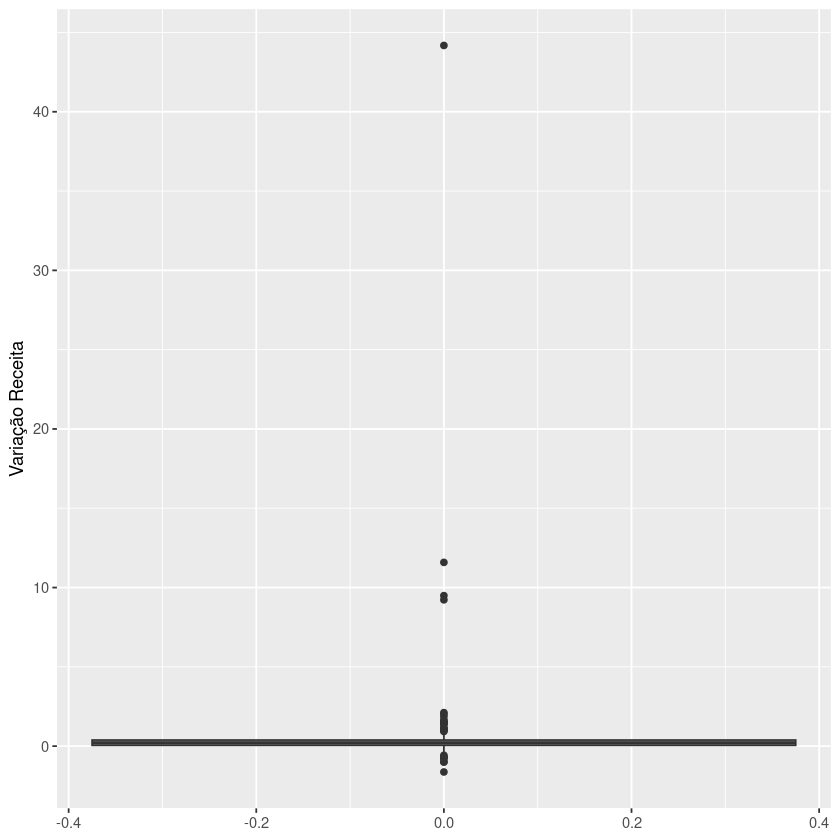

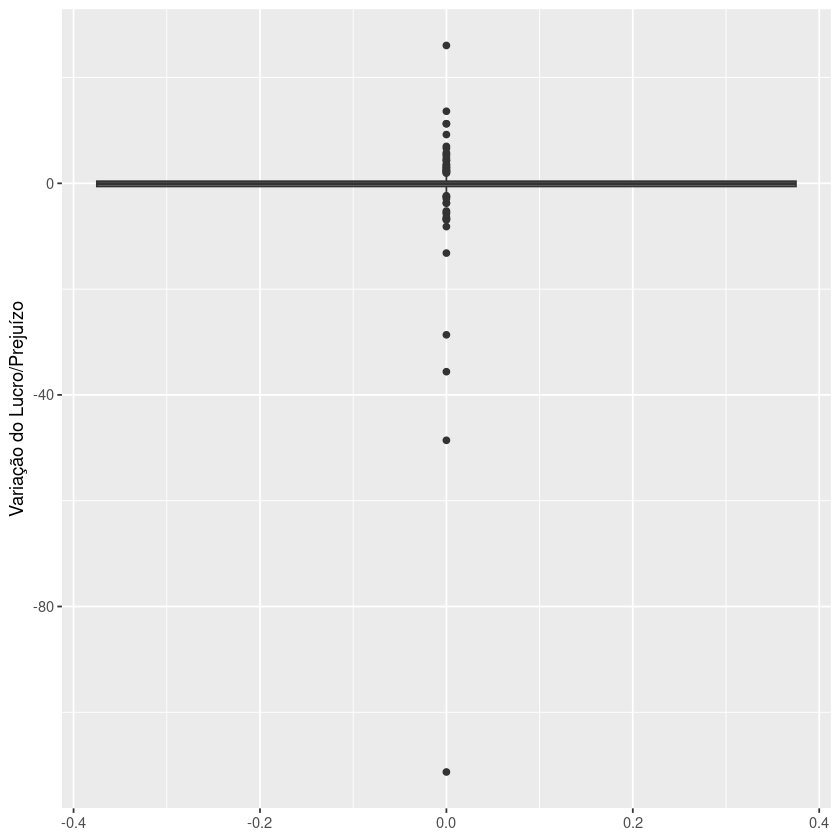

In [144]:
ggplot(base_3.01,aes(y = VARIACAO)) +
 geom_boxplot()+
labs(y= "Variação Receita")

ggplot(base_3.11,aes(y = VARIACAO)) +
 geom_boxplot()+
labs(y= "Variação do Lucro/Prejuízo")


<i>Através do gráfico de pontos observa-se que há uma concentração de variação tanto para as receitas, como para os lucros/prejuízos das empresas.</i>

<i> Observando o boxplot e as estatíticas descritidas obtidas através do summary dos modelos, verificamos a presença de outliers. Levando em conta os valores atípicos, a receita média das empresas aumentou 20,3% comparando os anos de 2021 e 2022, mas em média o lucro líquido diminuiu 10,40% no mesmo período. </i>

<b>8. Eliminando outliers e verificando as médias de variação por setores</b>

<i> Será verificado a variação média por setores para análise de qual/is apresentam uma média fora do padrão das demais</i>

In [55]:
media_setores_3.01 <- base_3.01 %>%
group_by(SETOR_ATIV) %>%
summarise(média = mean(VARIACAO, na.rm = TRUE),
            n_obs = n()) %>% 
  ungroup()

In [59]:
print(media_setores_3.01, n=49)

# A tibble: 49 × 3
   SETOR_ATIV                                                  média n_obs
   <fct>                                                       <dbl> <int>
 1 Agricultura (Açúcar, Álcool e Cana)                       0.367      11
 2 Alimentos                                                 0.237       9
 3 Bebidas e Fumo                                            0.482       2
 4 Bolsas de Valores/Mercadorias e Futuros                  -0.017       1
 5 Brinquedos e Lazer                                        3.74        3
 6 Comércio (Atacado e Varejo)                               0.250      32
 7 Comunicação e Informática                                 0.525      12
 8 Construção Civil, Mat. Constr. e Decoração                0.328      32
 9 Educação                                                  0.362       3
10 Embalagens                                                0.05        1
11 Emp. Adm. Part. - Agricultura (Açúcar, Álcool e Cana)    -0.00500     2
12 Emp

Warning message in geom_histogram(stat = "identity", fill = "green", color = "gray"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


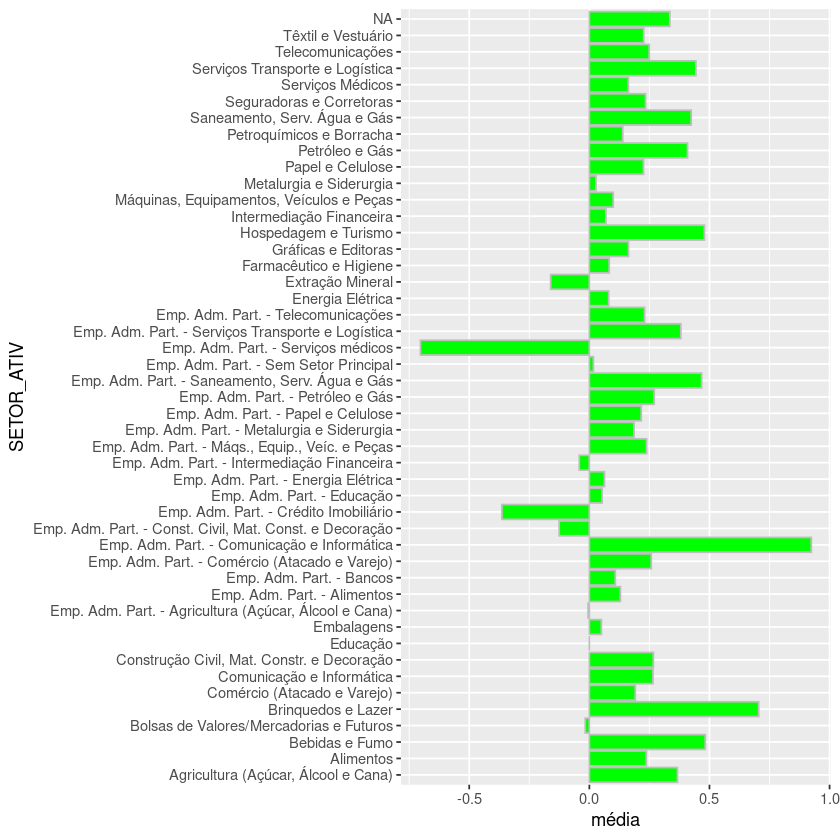

In [128]:
ggplot(media_setores_3.01, aes(y = média, x = SETOR_ATIV)) +
  geom_histogram(stat = "identity", fill= "green", color = "gray")+
coord_flip()


<i> Os setores <b>Brinquedos e Lazer</b>  e <b> Serviços, Transporte e Logística</b>  apresentam as maiores médias de variação,o setor <b> Brinquedos e Lazer</b>  possue apenas 3 observações, o que pode ter gerado uma média enviezada, já o setor <b> Serviços, Transporte e Logística</b>  possue 16 observações, por isso há a possibilidade de ter sido um setor que realmente teve um aumento de receita expressiva em relação aos anos de 2021 e 2022, outra possibilidade é alguma empresa deste setor estar puxando essa média por ter mudado fundamentos, ou outras razões a serem investigadas.
    Como o foco deste projeto é a restrutaração e limpeza do banco de dados, para darmos continuidade a análise realizaremos um filtra das observações eliminando os valores com uma variância muito grande em relação a média.

In [80]:
media_setores_3.11 <- base_3.11 %>%
group_by(SETOR_ATIV) %>%
summarise(média = mean(VARIACAO, na.rm = TRUE),
            n_obs = n()) %>% 
  ungroup()

In [81]:
print(media_setores_3.11, n=49)

# A tibble: 49 × 3
   SETOR_ATIV                                                média n_obs
   <fct>                                                     <dbl> <int>
 1 Agricultura (Açúcar, Álcool e Cana)                       0.688    11
 2 Alimentos                                                -0.128     9
 3 Bebidas e Fumo                                           -0.061     2
 4 Bolsas de Valores/Mercadorias e Futuros                  -0.104     1
 5 Brinquedos e Lazer                                       -0.826     3
 6 Comércio (Atacado e Varejo)                               0.539    32
 7 Comunicação e Informática                                -3.55     12
 8 Construção Civil, Mat. Constr. e Decoração                0.361    32
 9 Educação                                                 -1.77      3
10 Embalagens                                                0.326     1
11 Emp. Adm. Part. - Agricultura (Açúcar, Álcool e Cana)    -0.87      2
12 Emp. Adm. Part. - Alimentos  

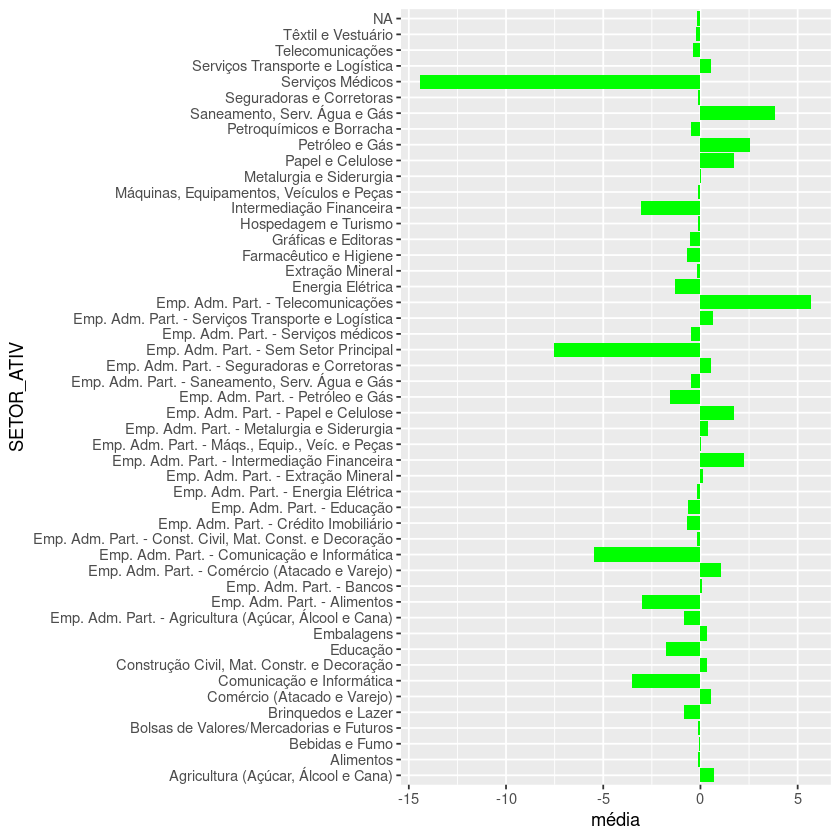

In [82]:
ggplot(media_setores_3.11, aes(y = média, x = SETOR_ATIV)) +
  geom_bar(stat = "identity", fill= "green")+
coord_flip()

<i>Em relação as contas de lucro/prejuízo, observamos que o maior outlier acontece com a variação do setor de <b>Serviços médicos</b>. Para dar prosseguimento a análise também eliminaremos os outliers assim como nas contas relacionadas a receitas.

In [93]:
media_setores_3.01 <-  base_3.01 %>% 
  filter(!(VARIACAO > 1|VARIACAO < -1)) %>%
 group_by(SETOR_ATIV) %>%
 summarise(média = mean(VARIACAO, na.rm = TRUE),
            n_obs = n()) %>% 
  ungroup()

In [94]:
print(media_setores_3.01, n=49)

# A tibble: 47 × 3
   SETOR_ATIV                                                 média n_obs
   <fct>                                                      <dbl> <int>
 1 Agricultura (Açúcar, Álcool e Cana)                      0.367      11
 2 Alimentos                                                0.237       9
 3 Bebidas e Fumo                                           0.482       2
 4 Bolsas de Valores/Mercadorias e Futuros                 -0.017       1
 5 Brinquedos e Lazer                                       0.705       1
 6 Comércio (Atacado e Varejo)                              0.191      30
 7 Comunicação e Informática                                0.265      10
 8 Construção Civil, Mat. Constr. e Decoração               0.266      28
 9 Educação                                                 0           2
10 Embalagens                                               0.05        1
11 Emp. Adm. Part. - Agricultura (Açúcar, Álcool e Cana)   -0.00500     2
12 Emp. Adm. Part. 

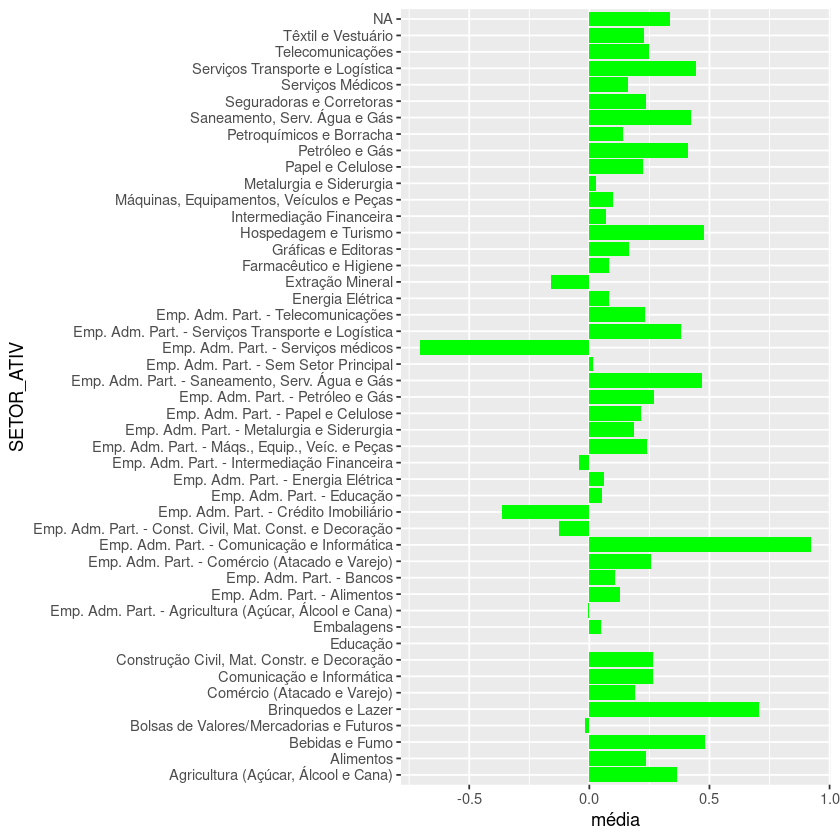

In [96]:
ggplot(media_setores_3.01, aes(y = média, x = SETOR_ATIV)) +
  geom_bar(stat = "identity", fill= "green")+
coord_flip()

In [97]:
media_setores_3.11 <-  base_3.11 %>% 
  filter(!(VARIACAO > 1|VARIACAO < -1)) %>%
 group_by(SETOR_ATIV) %>%
 summarise(média = mean(VARIACAO, na.rm = TRUE),
            n_obs = n()) %>% 
  ungroup()

In [98]:
print(media_setores_3.11, n=49)

# A tibble: 47 × 3
   SETOR_ATIV                                                média n_obs
   <fct>                                                     <dbl> <int>
 1 Agricultura (Açúcar, Álcool e Cana)                      0.409      9
 2 Alimentos                                               -0.315      8
 3 Bebidas e Fumo                                          -0.061      2
 4 Bolsas de Valores/Mercadorias e Futuros                 -0.104      1
 5 Brinquedos e Lazer                                      -0.826      3
 6 Comércio (Atacado e Varejo)                             -0.141     22
 7 Comunicação e Informática                                0.208      8
 8 Construção Civil, Mat. Constr. e Decoração              -0.155     21
 9 Educação                                                -0.0375     2
10 Embalagens                                               0.326      1
11 Emp. Adm. Part. - Agricultura (Açúcar, Álcool e Cana)   -0.586      1
12 Emp. Adm. Part. - Alimentos  

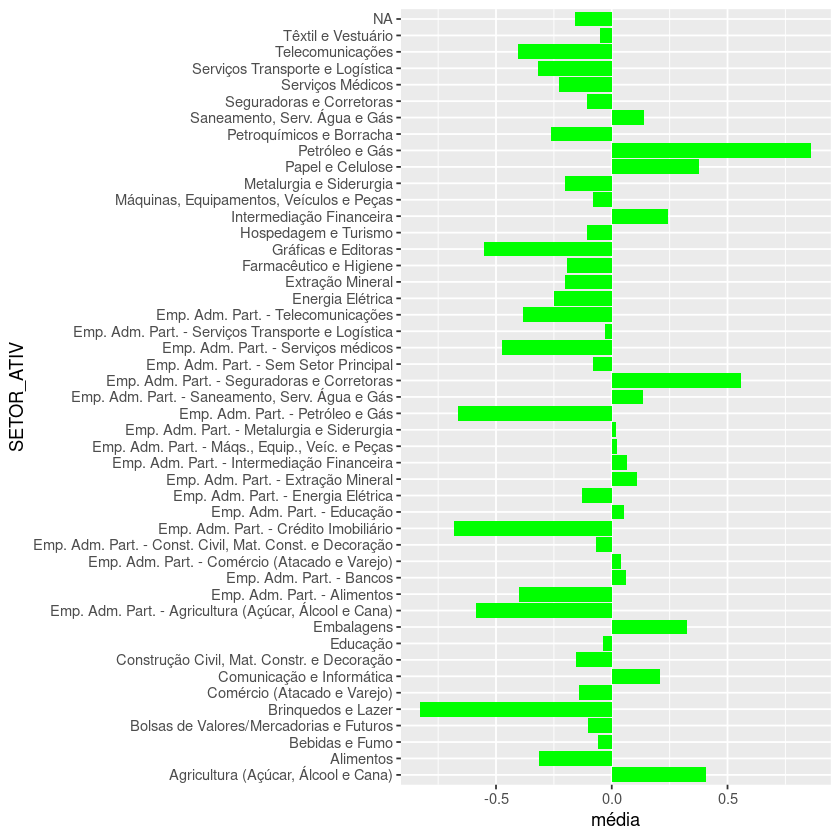

In [99]:
ggplot(media_setores_3.11, aes(y = média, x = SETOR_ATIV)) +
  geom_bar(stat = "identity", fill= "green")+
coord_flip()

<i> Ao filtrar as observações percebemos que as categorias que eram os maiores outliers se mantém no banco de dados, mas com um número menor de observações. O que mostra que haviam empresas aumentando a média de variação, mas que as mesmas não representavam uma tendência para todas as empresas do mesmo setor. Alguns setores possuem um número muito pequeno de observações, como é o caso do setor de <b>Papel e Celulose</b> o que gera uma média tendênciosa, não sendo possível fazer inferências sobre receitas, lucros/prejuízos para o setor como um todo. </i>

<i>O setor com o maior número de observações é o de <b>Comércio (Atacado e Varejo)</b> e apresenta um aumento percentual de receita de 19,1 % ao passo que no mesmo periódo tem uma média de prejuízo de 14,1 %, sendo a pandemia um dos fatores que podem ter impactado esses resultados. </i>

<i> Finalizo este projeto, cujo o objetivo principal foi demonstrar habilidades de programção em R para limpeza e reestruturação de datasets.
    Outra possível continuação de análise utilizando estes dados, seria comparar valores de variações em termos reais, utilizando, por exemplo, o IPCA como índice, analisar possíveis setores que tenha médias com viés pelo número reduzido de observações, dentre outras.